# Exercise A-6: Numerical instability caused by cancellation

We aim to evaluate the function
$$f(x) = exp(x) − 1$$
on a computer (in double precision arithmetic) for very small values of $|x|$, i.e., $0 < |x| ≪ 1$.

1. Experiment on the computer using double precision arithmetic (you
   may assume that the exp function is implemented correctly in double
   precision). Choose $x = 10^{−k}, k = 1, 2, 3, 4, 5, . . ..$
   
   For comparison, you can obtain an “almost exact” value of the function
   $f$ using the Taylor expansion of $exp(x)$ about $x = 0$, for example, up to the $10^{\text{th}}$ degree (this is a brute-force method).
   
   For comparison of the results, plot the relative error between the two
   evaluation methods on a logarithmic scale.
2. By comparing the two methods, you will see that the direct evaluation
   of $f(x)$ in its given form is numerically unstable, i.e., it yields very inaccurate results for $|x| \Rightarrow 0$. Can you explain this observation?

In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, Eq, init_printing, symbols, latex, det, pi, cos, sin
from sympy.abc import A
from IPython.display import display, Math
import math

In [2]:
# Pre-requisites for pretty printing
init_printing()

In [3]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)
def format_dot_product(name, matrix1: Matrix, matrix2: Matrix):
    result = matrix1 * matrix2
    # Start LaTeX formatting
    latex_str = f"{name} = \\begin{{bmatrix}}\n"
    # Iterate over the result matrix to format each cell
    for i in range(result.rows):
        row_operations = []
        for j in range(result.cols):
            terms = []
            for k in range(matrix1.cols):
                terms.append(f"{latex(matrix1[i, k])} \\cdot {latex(matrix2[k, j]) if matrix2.shape[1] > 1 else latex(matrix2[k])}")
            operation = " + ".join(terms)
            row_operations.append(f"({operation})")
        latex_str += " & ".join(row_operations) + " \\\\\n"

    latex_str += "\\end{bmatrix} = " + latex(result)
    return result, latex_str

# Solution for 1)

Experiment on the computer using double precision arithmetic (you may assume that the exp function is implemented correctly in double
precision). Choose $x = 10^{−k}, k = 1, 2, 3, 4, 5, . . ..$

For comparison, you can obtain an “almost exact” value of the function
$f$ using the Taylor expansion of $exp(x)$ about $x = 0$, for example, up to the $10^{\text{th}}$ degree (this is a brute-force method).

For comparison of the results, plot the relative error between the two
evaluation methods on a logarithmic scale.

In [23]:
def taylor_exp_minus_one(x):
    return sum((x ** n) / math.factorial(n) for n in range(1, 11))

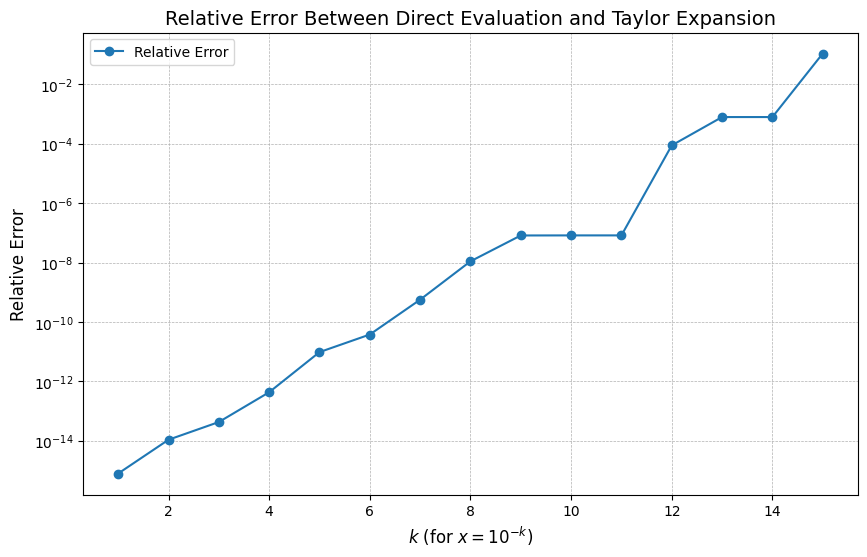

In [27]:
# Define x = 10^(-k) for k = 1, 2, ..., 15
k_values = np.arange(1, 16)
x_values = 10.0 ** (-k_values)

# Direct computation of f(x) = exp(x) - 1
f_direct = np.exp(x_values) - 1

f_taylor = np.array([taylor_exp_minus_one(x) for x in x_values])

# Compute relative error
relative_error = np.abs(f_direct - f_taylor) / np.abs(f_taylor)

plt.figure(figsize=(10, 6))
plt.semilogy(k_values, relative_error, marker='o', label="Relative Error")
plt.xlabel(r"$k$ (for $x = 10^{-k}$)", fontsize=12)
plt.ylabel("Relative Error", fontsize=12)
plt.title("Relative Error Between Direct Evaluation and Taylor Expansion", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


# Solution for 2)

By comparing the two methods, you will see that the direct evaluation
   of $f(x)$ in its given form is numerically unstable, i.e., it yields very inaccurate results for $|x| \Rightarrow 0$. Can you explain this observation?